[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/source/color_conversions.ipynb)

# Color space conversion

In this tutorial we are going to learn how to convert image from different image spaces using `kornia.color`.

## Explanation

Images are asumed to be loaded either in RGB or Grayscale space.

1.   We will use OpenCV to load images.
2.   Convert from BGR to RGB (note that OpenCV loads images in BGR format).



In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


url = "https://github.com/kornia/data/raw/main/simba.png"
download_image(url)

'simba.png'

libpng warning: iCCP: known incorrect sRGB profile


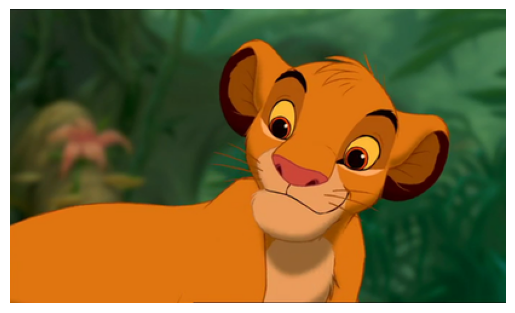

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# load using opencv and convert to
img_bgr: np.array = cv2.imread("simba.png", cv2.IMREAD_COLOR)
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off");

Alternatively we can use use `kornia.color` to perform the color transformation.

1.   Convert the `np.array` to `torch.Tensor`
2.   Convert the tensor to RGB
3.   Convert back the tensor to numpy for visualisation.

In [ ]:
%%capture
!pip install kornia

In [ ]:
import kornia as K
import torch
import torchvision

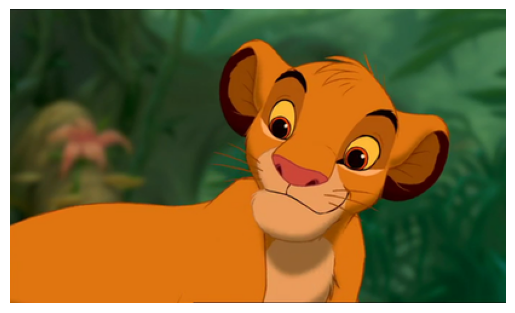

In [ ]:
# convert the numpy array to torch
x_bgr: torch.Tensor = K.image_to_tensor(img_bgr)

# to BGR
x_rgb: torch.Tensor = K.color.bgr_to_rgb(x_bgr)

# convert back to numpy and visualize
img_np: np.array = K.tensor_to_image(x_rgb)
plt.imshow(img_np)
plt.axis("off");

Using `kornia` we easily perform color transformation in batch mode.

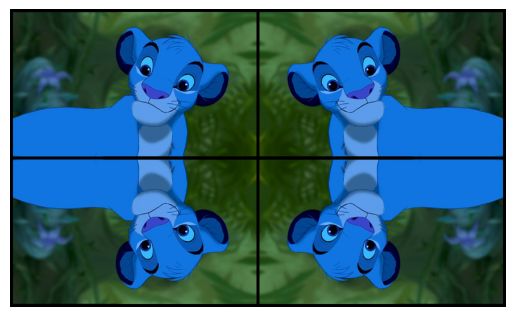

In [ ]:
def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.array = K.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis("off")


# create a batch of images
xb_bgr = torch.stack([x_bgr, K.geometry.hflip(x_bgr), K.geometry.vflip(x_bgr), K.geometry.rot180(x_bgr)])
imshow(xb_bgr)

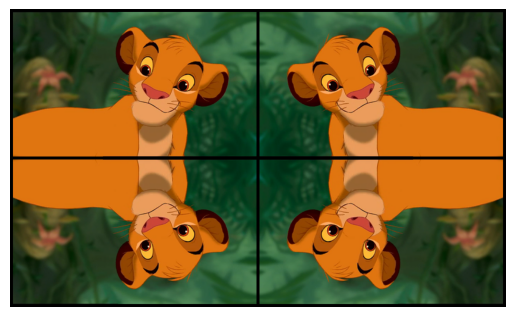

In [ ]:
# convert to back to RGB
xb_rgb = K.color.bgr_to_rgb(xb_bgr)
imshow(xb_rgb)

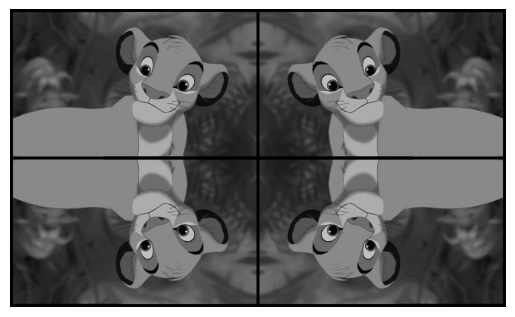

In [ ]:
# convert to grayscale
# NOTE: image comes in torch.uint8, and kornia assumes floating point type
xb_gray = K.color.rgb_to_grayscale(xb_rgb.float() / 255.0)
imshow(xb_gray)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


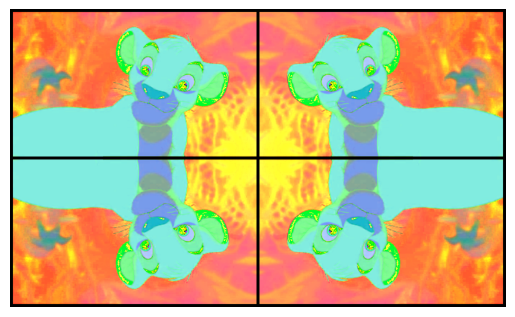

In [ ]:
# convert to HSV
xb_hsv = K.color.rgb_to_hsv(xb_rgb.float() / 255.0)
imshow(xb_hsv)